# Exercizes on clustering

## Preparazione

### Descrizione dataset

Abbiamo tre dataset per il clustering:

1) 3-clusters [150,2]: dataset semplice che contiene tre cluster ben separati (alto BSSE?)
    
    questi cluster sono globulari e semplici

2) dataset-DBSCAN [6118,2]: dataset degli autori di DBSCAN compatibile e fatto apposta per esso, lo useremo anche su k-means
    
    questi cluster NON sono di forma globulare

3) CURE-complete [86558,2]: dataset degli autori di CURE, molto grande e completo
    
    questi cluster sono di forma globulare ma con del rumore 

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

### Caricamento dataset

In [27]:
import csv
import sys
from os.path import join
import numpy as np

Questa funzione legge i dati dal file, carica gli attributi di configurazione specificati nell'header (numeri degli esampi e features), la lista dei nomi delle features e  e carica tutti i dati nella matrice `data` (ogni riga è un esempio, ogni colonna è una feature).

I `csv` file hanno il numero nella prima riga due valori separati da virgola: il numero di esempi e il numero di features. La seconda riga contiene i nomi delle features separate da virgole, in questo caso i valori di x e y per proiettarli sugli assi. Le righe successive contengono i dati, uno per riga, con i valori delle features separate da virgole.

In [28]:
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file) # (n_samples, n_features)
       n_samples = int(temp1[0])
       
       print("n_samples= ", n_samples)
       
       n_features = int(temp1[1])
       temp2 = next(data_file) # feature_names (x, y)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

In [29]:
file_path="data/"

file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    

data1, feature_names1, n_samples1, n_features1 = load_data(file_path, file_name1)
data2, feature_names2, n_samples2, n_features2 = load_data(file_path, file_name2)
data3, feature_names3, n_samples3, n_features3 = load_data(file_path, file_name3)

n_samples=  150
n_samples=  6118
n_samples=  86558


Stampiamo alcuni dati

In [30]:
print("Dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("\nDataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("\nDataset n. 3: n samples, n features")
print(n_samples3, n_features3)

Dataset n. 1: n samples, n features
150 2

Dataset n. 2: n samples, n features
6118 2

Dataset n. 3: n samples, n features
86558 2


### Visualizziamo i dataset

Metodo per la stampa dei dataset

In [31]:
import matplotlib.pyplot as plt

def plot_data(title, data, feature_names, psize):
    fig = plt.figure(figsize=(6,3))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title(title)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    plt.plot(data[:,0], data[:,1], '.', markersize = psize)

    plt.show()

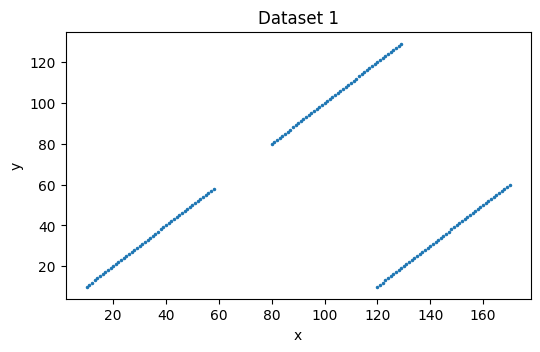

In [32]:
plot_data("Dataset 1", data1, feature_names1, 3)

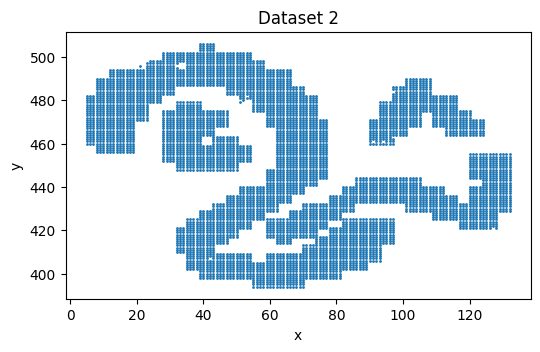

In [33]:
plot_data("Dataset 2", data2, feature_names2, 2)

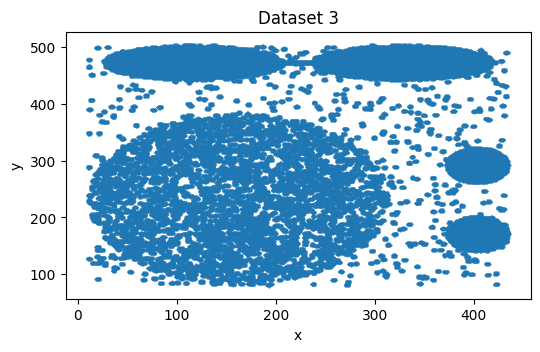

In [34]:
plot_data("Dataset 3", data3, feature_names3, 1)

### Note sui dataset

**NB -->** 
non sono dataset di forma globulare questi!! (Quindi dovrebbe essere che k-means non va bene).
Questi cluster hanno del rumore.

## Clustering - Esercizi Individuali

### Esercizio 1 - Stampare e analizzare i cluster per i 3 dataset

##### Metodi per plottare i cluster e stampare i risultati

In [35]:
def plot_clusters(title, data, n_samples, kmeans, psize):

    fig = plt.figure(figsize=(6, 3))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title(title)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color = ['b','g','r','c','m','y','k','gold']
        
    # plot the dataset
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i, 0] for i in range(n_samples) if kmeans.labels_[i] == clu]
        data_list_y = [data[i, 1] for i in range(n_samples) if kmeans.labels_[i] == clu]
        
        plt.scatter(data_list_x, data_list_y, s = psize, edgecolors='none', c = color[clu], alpha = 0.8)

    plt.show()

In [36]:
def print_result_cluster(n_cluster, n_samples, kmeans, data):
    i = 0
    counter = [0] * n_cluster
    for i in range(n_samples):
        cluster_n = kmeans.labels_[i]
        if(counter[cluster_n] != 1):
            print(str(i) + " = (" + str(data[i,0]) + ", " + str(data[i,1]) + ") in cluster n." + str(cluster_n))
            counter[cluster_n] = 1

#### Dataset 1

In [37]:
from sklearn.cluster import KMeans

np.random.seed(5)

k = 3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

Stampiamo 1 esempio per ogni cluster

In [38]:
print_result_cluster(k, n_samples1, kmeans1, data1)

0 = (10.0, 10.0) in cluster n.0
49 = (80.0, 80.0) in cluster n.2
99 = (120.0, 10.0) in cluster n.1


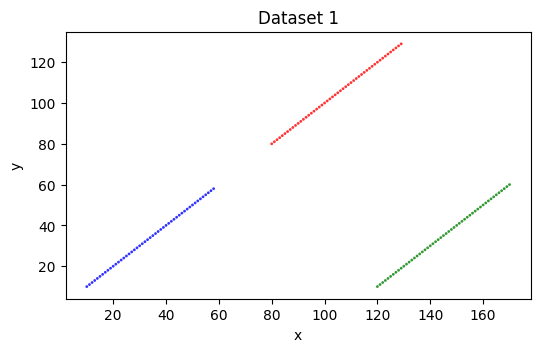

In [39]:
plot_clusters("Dataset 1", data1, n_samples1, kmeans1, 4)

#### Dataset 2

In [40]:
np.random.seed(5)

k = 4
kmeans2 = KMeans(n_clusters = k, random_state=0).fit(data2)

Stampiamo 1 elemento per ogni cluster

In [41]:
print_result_cluster(k, n_samples2, kmeans2, data2)

0 = (5.0, 482.0) in cluster n.1
924 = (32.0, 421.0) in cluster n.2
1095 = (35.0, 450.0) in cluster n.3
4341 = (83.0, 440.0) in cluster n.0


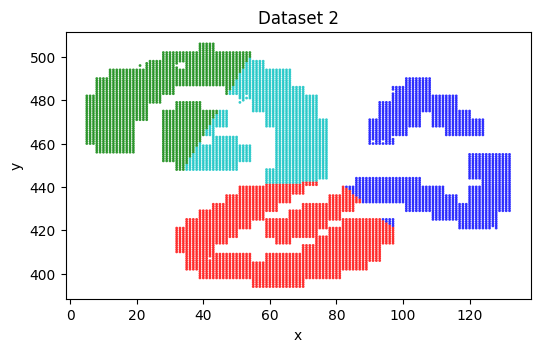

In [42]:
plot_clusters("Dataset 2", data2, n_samples2, kmeans2, 4)

##### Analiziamo cos'è successo:

Kmeans tenta di minimizzare la somma delle distanze tra i dati assegnati ad un centroide (WCSS - Coesione cluster). Questa metrica è usata sia per determinare il numero migliore di cluster per il dataset, sia per massimizzare la qualità dei cluster. 

Quindi, un basso valore di WCSS indica che i dati sono vicini ai loro centroidi corrispondenti e di conseguenza i punti appartenenti ad un cluster sono tutti simili tra di loro.

E' importante evidenziare che kmeans e strettamente influenzato sia dal numero di cluster che dalla posizione iniziale dei centroidi, infatti solitamente si provano più esecuzioni con starting point diversi.

L'algoritmo k-means lavora proprio in questo modo, crea 3 centroidi (in questo caso visto che k = 3) e li inizializza a valori randomici. Ad ogni iterazione l'algoritmo assiocia ad ogni sample un centroide (che è una lista di valori). 

Dopo di che viene calcolata la posizione del centroide (la media dei valori dei samples che appartengono al centroide) e viene calcolata la distanza tra il centroide e ogni sample. Se la distanza è minore di una certa soglia (che è un parametro che viene scelto in base alla dimensione del dataset) allora il sample viene assegnato al centroide. 

In questo modo viene calcolata la posizione dei centroidi e viene fatta una nuova iterazione ricalcolando il centroide sulla base delle media degli esempi che fanno parte del cluster generato ne fanno parte.

K-mean cerca di minimizzare SSE (sum squared error) e di conseguenza tende a creare cluster di forma globulare.

#### Dataset 3

In [43]:
np.random.seed(5)

k = 5
kmeans3 = KMeans(n_clusters = k, random_state=0).fit(data3)
# kmeans3b = KMeans(n_clusters = k, random_state=1).fit(data3)
# kmeans3c = KMeans(n_clusters = k, random_state=3).fit(data3)

In [44]:
print_result_cluster(k, n_samples3, kmeans3, data3)

0 = (9.0, 480.0) in cluster n.4
11 = (9.0, 350.0) in cluster n.3
19 = (9.0, 240.0) in cluster n.0
50893 = (221.0, 226.0) in cluster n.2
51248 = (223.0, 458.0) in cluster n.1


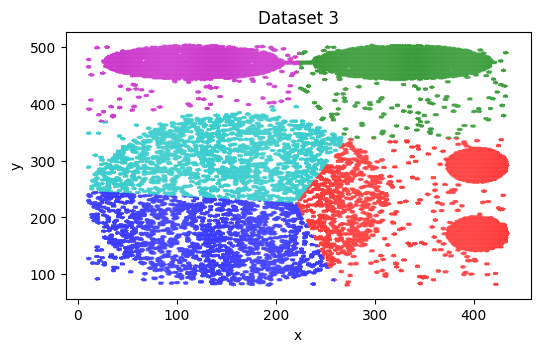

In [45]:
plot_clusters("Dataset 3", data3, n_samples3, kmeans3, 0.5)

##### Analizziamo cos'è successo

Sempre stesso discorso di prima, i punti sono classificati in base al centroide più vicino. Quindi un punto può appartene ad un cluster, quindi essere più vicino ai punti che compongono un determinato cluster, ma essere comunque più vicini al centroide di un altro cluster e quindi essere classificati in maniera "errata".

### Esercizio 2 - Selezionare il miglior modello per i 3 dataset

#### Consegna e note

Usiamo delle metriche per valutare i modello prodotti e le utilizziamo per determinare il miglior modello. 

In questo caso useremo la metrica `silhouette score` che è una metrica che misura la qualità di un clustering.

Indicazioni prof:

*In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.*

**Note:**
*It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.*

Valutiamo il primo dataset con k = 3 e con 10evaluation on 1st dataset (K = 3, 10 times random init).

Analizziamo i parametri del metodo KMeans:
- **n_init** : Quante volte deve girare KMeans con centroidi iniziali randomici
- **init** : Definisce il tipo di inizializzazione dei centroidi. In questo caso sono stati inizializzati randomicamente con `random`.

#### Definiamo il metodo per valutare i cluster

In [46]:
from sklearn.metrics import silhouette_score

def eval_cluster(k, data, title, rep):
    sil = {}
    best_clusterer = None
    best_run = None
    best_sil = -1
    for i in range(1, rep):
        cluster = KMeans(n_clusters = k, n_init = 1, init = 'random')
        cluster_labels = cluster.fit_predict(data)
        
        silhouette_avg = silhouette_score(data, cluster_labels)
        # print("Run ", i, "  avg. silhouette: ", silhouette_avg)
        sil[i] = silhouette_avg
        if silhouette_avg > best_sil:
            best_sil = silhouette_avg
            best_cluster = cluster
            best_run = i
            
    plt.figure().suptitle(title)
    plt.plot(list(sil.keys()), list(sil.values()))
    plt.xlabel("Run number")
    plt.ylabel("Average silhouette value")
    plt.show()
    print("\nBest clusterer is from run number --", best_run, "-- and has an avg silhouette of ",best_sil)

#### Dataset 1

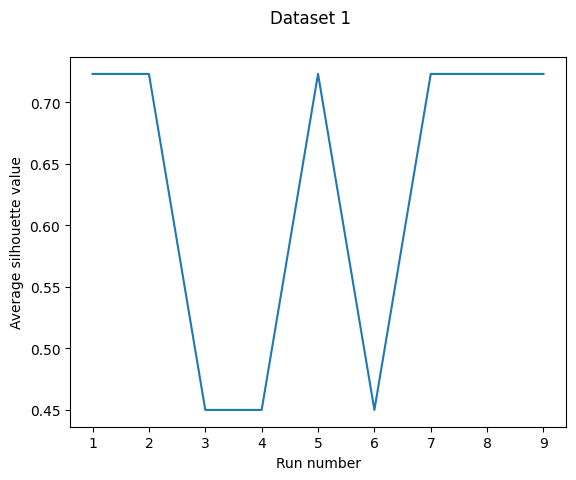


Best clusterer is from run number -- 1 -- and has an avg silhouette of  0.7229402453727759


In [47]:
eval_cluster(3, data1, "Dataset 1", 10)

##### Plottiamo il miglior valore della silhouette che abbiamo trovato

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_silhouette(n_clusters, X):    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

NameError: name 'cluster_labels' is not defined

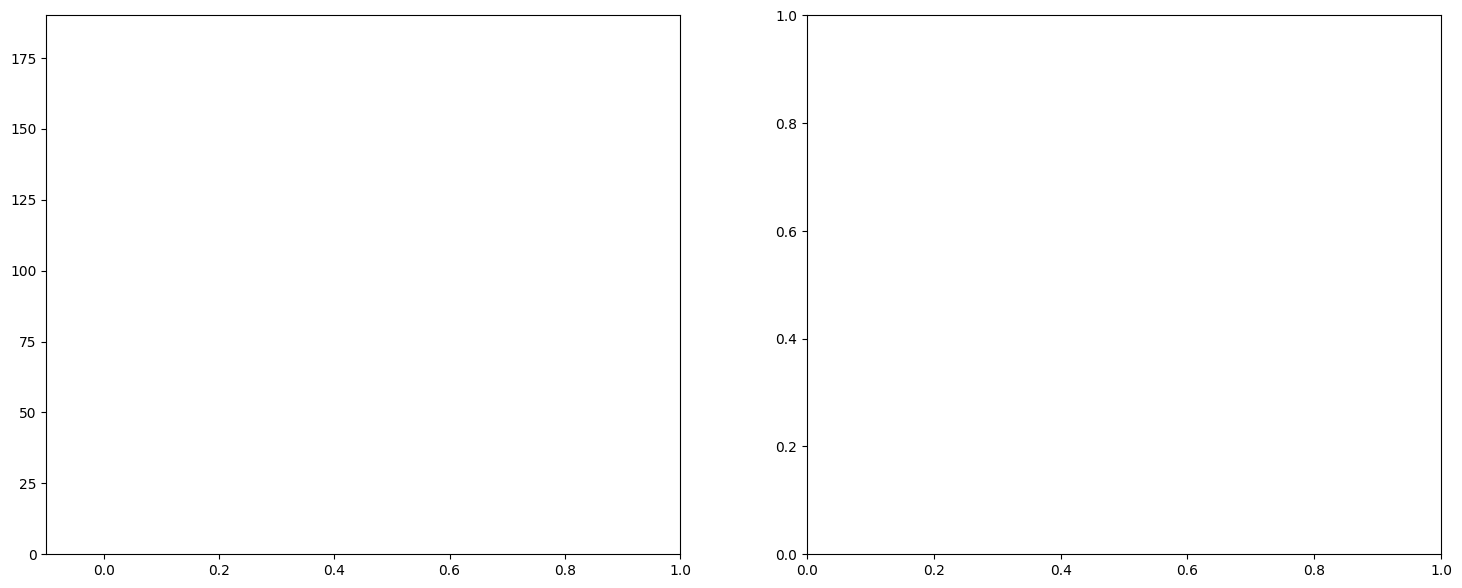

In [49]:
plot_silhouette(3, data1)

#### Dataset 2

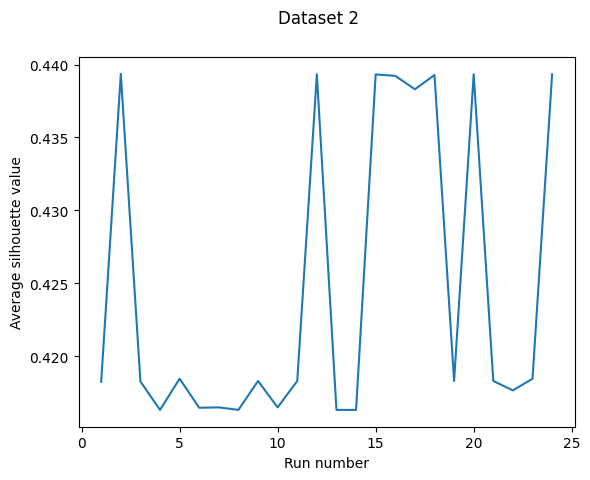


Best clusterer is from run number -- 2 -- and has an avg silhouette of  0.4393549490745339


In [50]:
eval_cluster(4, data2, "Dataset 2", 25)

#### Dataset 3

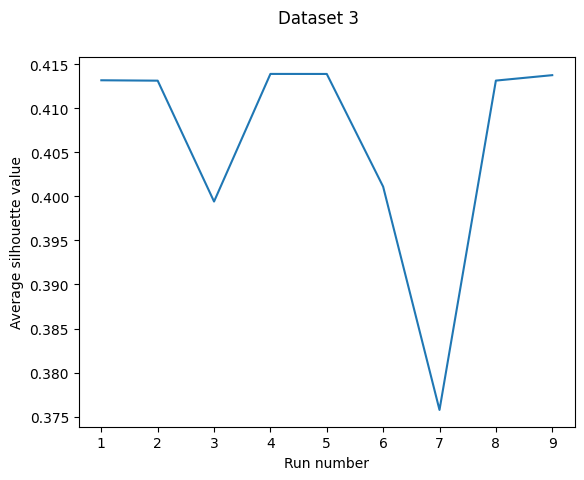


Best clusterer is from run number -- 4 -- and has an avg silhouette of  0.41389066347729525


In [51]:
eval_cluster(5, data3, "Dataset 3", 10)

### Esercizio 3 - Selezioniamo il miglior numero di cluster per i dataset

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

#### Metodo per la valutazione miglior k

In [52]:
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt

def find_best_k(rep, data):
    best_sil_tot = -1
    best_k = 0;

    sil_val = np.zeros(shape=(10,2))

    for k in range(2, 10):
        sil = {}
        best_clusterer = None
        best_run = None
        best_sil = -1

        for i in range(1, rep):
            clusterer = KMeans(n_clusters = k, n_init = 1, init='random')
            cluster_labels = clusterer.fit_predict(data)

            silhouette_avg = silhouette_score(data, cluster_labels)
            sil[i] = silhouette_avg
            if silhouette_avg > best_sil:
                best_sil = silhouette_avg
                best_clusterer = clusterer
                best_run = i

        # print("\nk = ", k, "Best clusterer is from run number ", best_run, "and has an avg silhouette of", best_sil)

        sil_val[k] = [k,best_sil]

        if best_sil_tot < best_sil:
            best_k = k
            best_sil_tot = best_sil

    print("\nBest value of k is", best_k, "and has an avg silhouette of", best_sil_tot)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    x = sil_val[:,0]
    y = sil_val[:,1]

    ax.scatter(x, y)
    plt.show()

#### Dataset 1


Best value of k is 3 and has an avg silhouette of 0.7229402453727759


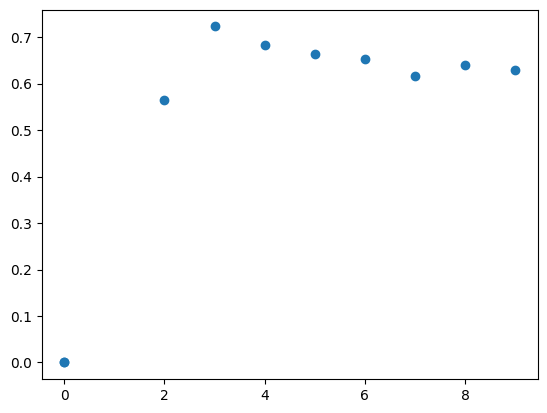

In [53]:
find_best_k(100, data1)

#### Dataset 2


Best value of k is 3 and has an avg silhouette of 0.48003124314329937


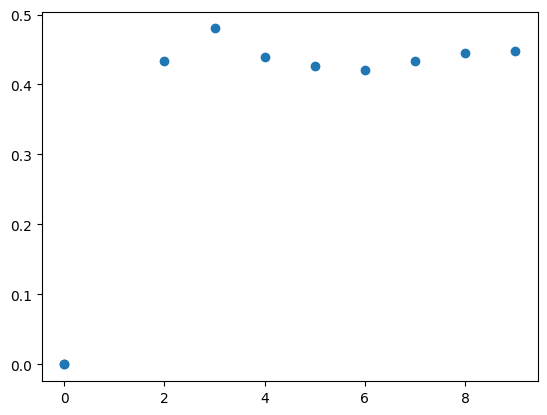

In [54]:
find_best_k(20, data2)

#### Dataset 3

In [55]:
find_best_k(3, data3)

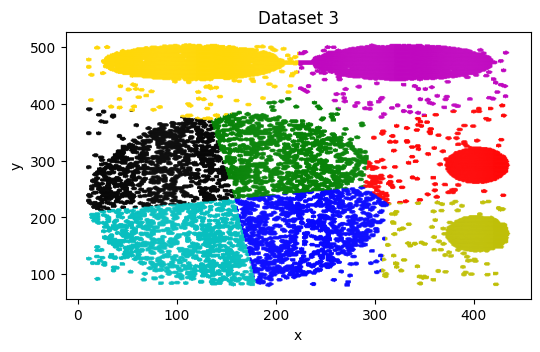

In [ ]:
k=8
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

plot_clusters("Dataset 3", data3, n_samples3, kmeans3, 1)

### Esercizio 4 - Testiamo le performance di DBSCAN sul secondo dataset

##### Consegna prof

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

##### Appunti su DBSCAN

###### **min_samples e eps**

`Eps` e `min_samples` sono due parametri importanti utilizzati nel metodo di clustering DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN è un metodo di clustering basato sulla densità che cerca di raggruppare insieme punti che sono molto vicini tra loro in uno stesso cluster, mentre i punti che sono meno densi o isolati vengono etichettati come "rumore".

- Il parametro `eps` (epsilon) specifica la distanza massima che può esistere tra due punti per considerarli appartenenti allo stesso cluster. In altre parole, se la distanza tra due punti è minore o uguale a eps, allora questi punti vengono considerati parte dello stesso cluster.

- Il parametro `min_samples` specifica il numero minimo di punti che devono essere presenti in una regione di densità sufficientemente elevata per essere considerati un cluster. Ad esempio, se min_samples è impostato su 5, allora una regione con almeno 5 punti verrà considerata un cluster, mentre una regione con meno di 5 punti verrà etichettata come "rumore".

Scegliere i valori appropriati per eps e min_samples può essere una sfida, poiché dipende dalle caratteristiche dei dati e dallo scopo del clustering. In genere, è necessario eseguire delle prove per trovare i valori ottimali per questi parametri.

###### **Come trovo i migliori valori per eps e min_samples?**

Ci sono diversi modi per trovare i valori ottimali per eps e min_samples nel metodo di clustering DBSCAN. Ecco alcune possibili strategie:

Plot della distribuzione della distanza tra punti: un modo per trovare un buon valore per eps è quello di tracciare un grafico della distribuzione della distanza tra tutte le coppie di punti nei dati. Il grafico dovrebbe mostrare un picco a una distanza specifica, che potrebbe indicare la presenza di cluster. Il valore di eps dovrebbe essere scelto intorno a questo picco.

Utilizzo di una distanza di soglia: un altro modo per scegliere un valore per eps è quello di utilizzare una distanza di soglia, ad esempio il 5% o il 1% della distanza massima tra i punti.

Utilizzo di un metodo di ottimizzazione: è possibile utilizzare un metodo di ottimizzazione per cercare i valori ottimali di eps e min_samples, ad esempio utilizzando una funzione di costo basata sulla qualità del clustering o sulla silhouette dei punti.

Sperimentazione: infine, è possibile utilizzare un approccio di tentativi ed errori, sperimentando con diversi valori per eps e min_samples e valutando la qualità del clustering ottenuto.

In ogni caso, è importante tenere presente che i valori ottimali per eps e min_samples dipendono dalle caratteristiche dei dati e dallo scopo del clustering, quindi potrebbe essere necessario eseguire delle prove per trovare i valori che funzionano meglio per i tuoi dati.

#### DBSCAN

Metodo generico

In [ ]:
from sklearn.cluster import DBSCAN

def dbscan_plot(eps, min_samples, data, datasetname):

    clustering = DBSCAN(eps = eps, min_samples = min_samples).fit(data)
    
    silhouette_avg = silhouette_score(data, cluster_labels)

    plt.figure(figsize=(10,4)).suptitle('DBSCAN on ' + datasetname)
    for clu in range(len(np.unique(clustering.labels_))):
        data_list_x = [data[i, 0] for i in range(len(data)) if clustering.labels_[i] == clu]
        data_list_y = [data[i, 1] for i in range(len(data)) if clustering.labels_[i] == clu]
        plt.scatter(data_list_x, data_list_y, s=10, edgecolors='none',alpha=0.5)

    plt.show()

#### DBSCAN su dataset 2

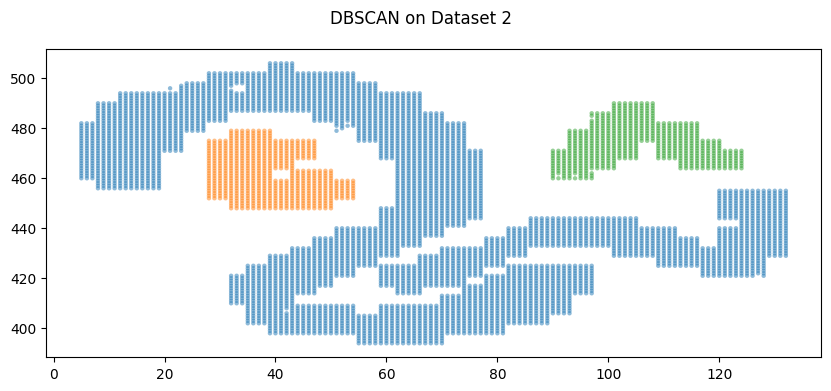

In [ ]:
EPS = 2
MIN_PTS = 5

dbscan_plot(EPS, MIN_PTS, data2, "Dataset 2")

##### Dataset 3

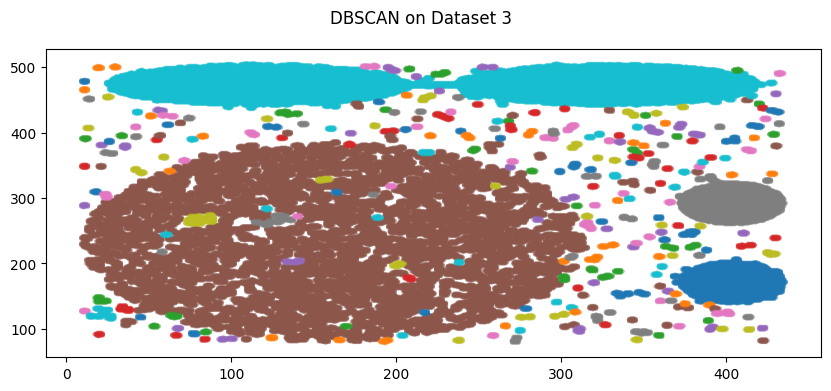

In [ ]:
EPS = 2
MIN_PTS = 10

dbscan_plot(EPS, MIN_PTS, data3, "Dataset 3")

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

#### Metodo per trovare best eps

In [ ]:
# Reachability distance for 10th NN on Dataset 2
from sklearn.neighbors import NearestNeighbors

def plot_reachability(data):
    
    k_knn = 10
    knn = NearestNeighbors().fit(data)
    distances,_ = knn.kneighbors(data, n_neighbors = k_knn, return_distance = True)
    distances = np.sort(distances[:,-1],axis=0)

    plt.figure(figsize=(10,4)).suptitle('Reachability distances for 10th NN on Dataset')
    plt.plot(distances)
    plt.show()

#### Dataset 2

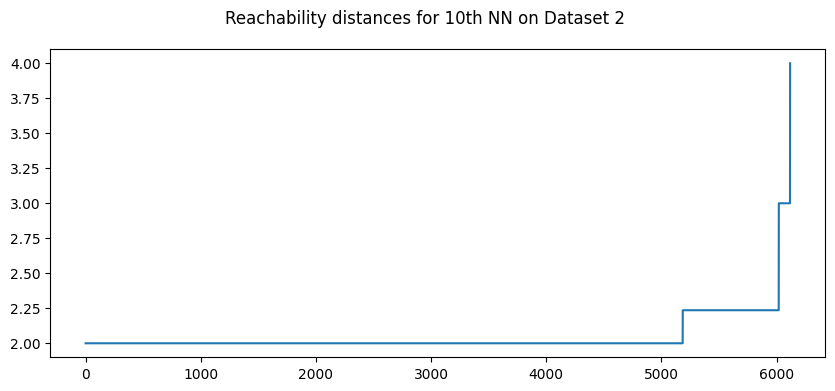

In [ ]:
plot_reachability(data2)

#### Dataset 3

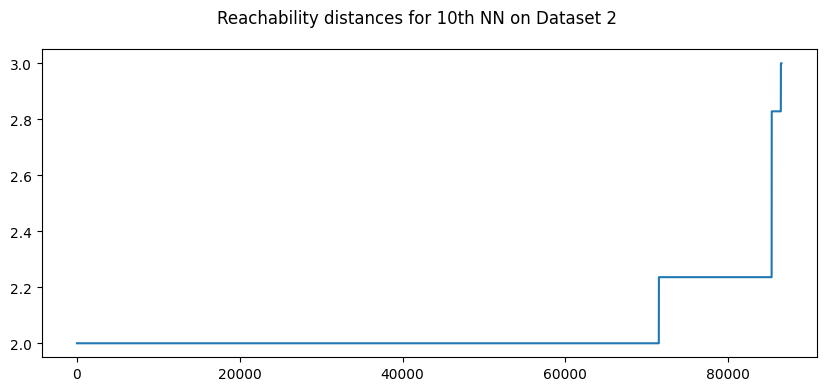

In [ ]:
plot_reachability(data3)

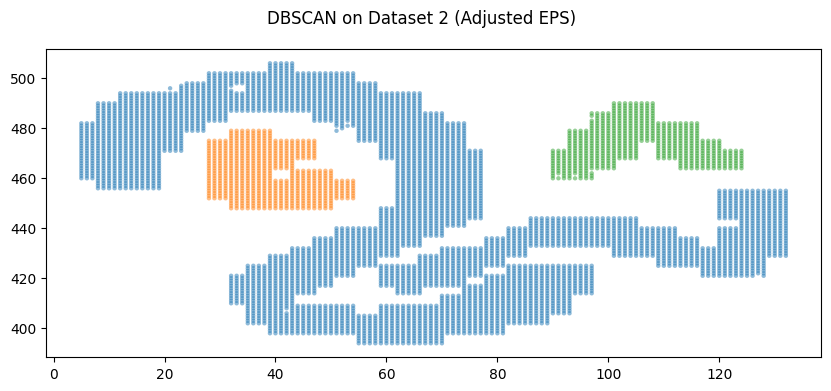

In [ ]:
MIN_PTS = 10
EPS = 2.25

dbscan_plot(EPS,MIN_PTS,data2,"Dataset 2 (Adjusted EPS)")

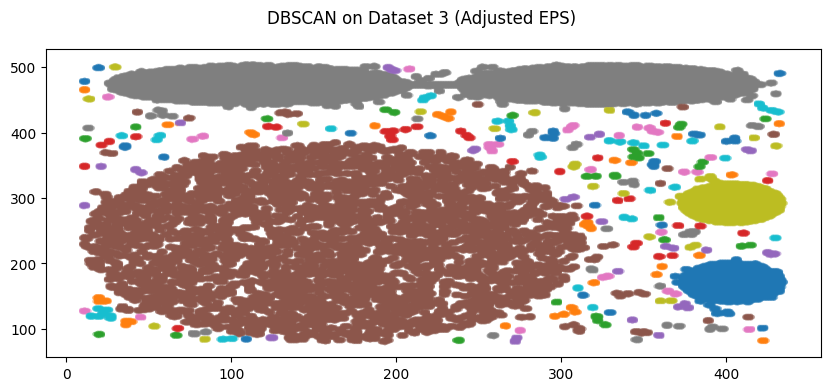

In [ ]:
MIN_PTS = 13
EPS = 3

dbscan_plot(EPS, MIN_PTS, data3, "Dataset 3 (Adjusted EPS)")